In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [2]:
E1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test71 E1.csv.csv")
E2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test72 E2.csv.csv")
E3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test73 E3.csv.csv")


In [3]:
#Loading the corresponding force data
force_E1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#71 E1.log" , delimiter = "\t")
force_E2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#72 E2.log" , delimiter = "\t")
force_E3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#73 E3.log" , delimiter = "\t")


In [4]:
#Visulizing the force data - test #2 - 6 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_E1 = force_E1["Time"]
x_force_E2 = force_E2["Time"]
x_force_E3 = force_E3["Time"]


#force
Load_E1 = force_E1["Load"]
Load_E2 = force_E2["Load"]
Load_E3 = force_E3["Load"]


#plt.plot(x_force_E1,Load_E1,color = 'green', label = 'force data E1 test #42' )
#plt.plot(x_force_E2,Load_E2,color = 'blue', label = 'force data E2 test #43' )
# plt.plot(x_force_E3,Load_E3,color = 'yellow', label = 'force data E3 test 44' )


<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for E1


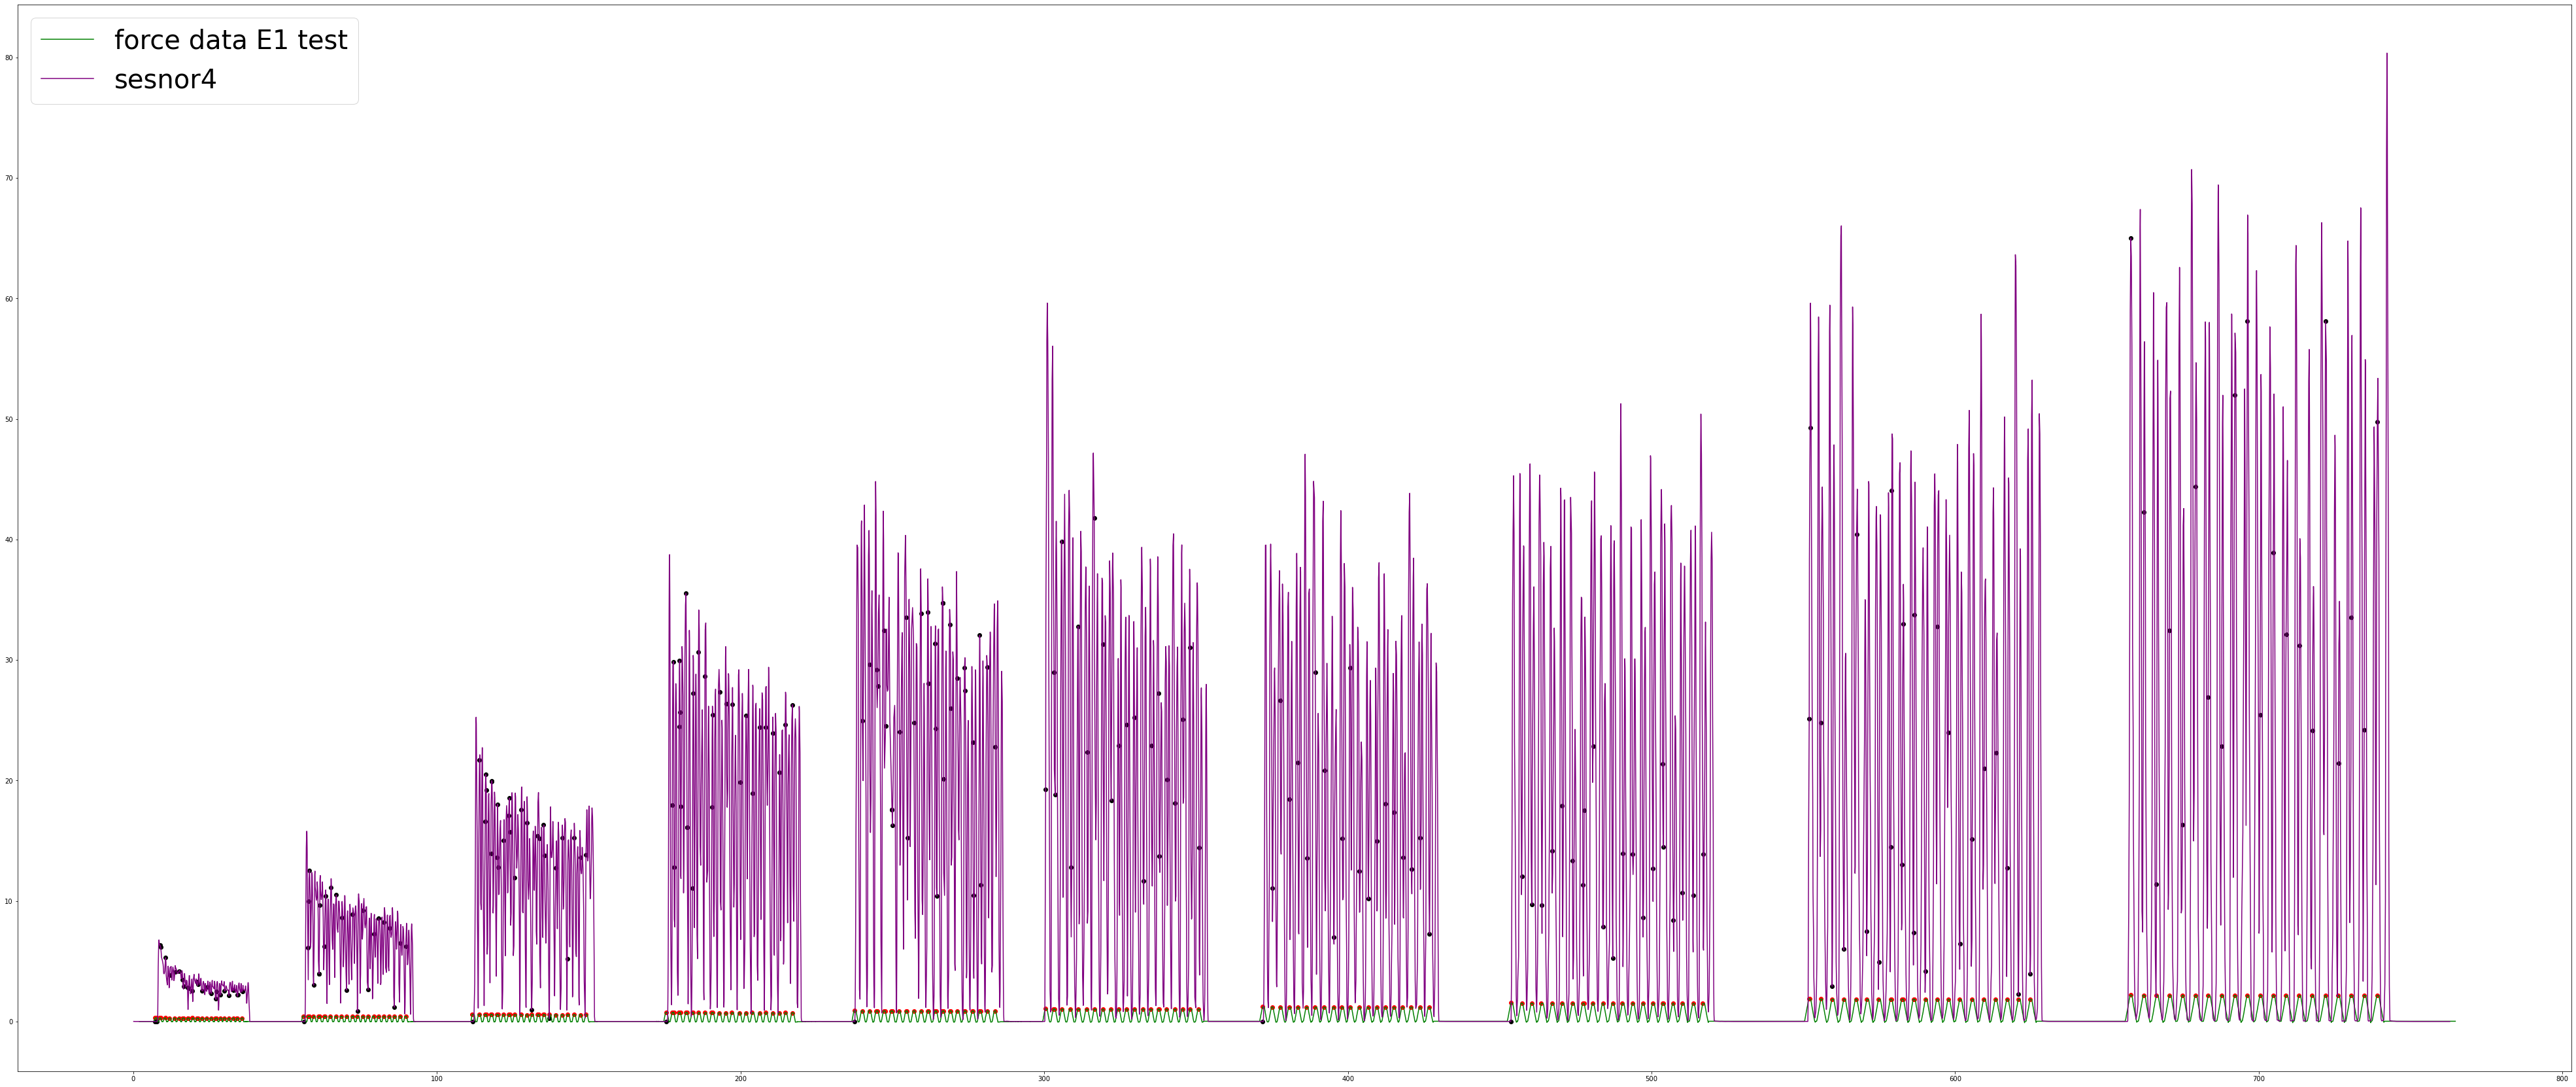

In [20]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - E1

plt.figure(figsize=(70, 30))

# plt.plot(E1["Unnamed: 0"],E1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(E1["Unnamed: 0"],E1["s2_d"], color = 'red', label = 'sesnor2')
#plt.plot(E1["Unnamed: 0"],E1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(E1["Unnamed: 0"],E1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_E1 = x_force_E1 + 2
scaled_E1 = E1["Unnamed: 0"]

plt.plot(scaled_x_force_E1,Load_E1,color = 'green', label = 'force data E1 test' )
plt.plot(scaled_E1,E1["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for E1")

#finding the peaks
pidx_Load_E1, _ = find_peaks(Load_E1,prominence= 0.1 )
peaks_Load_E1 = Load_E1[pidx_Load_E1]
peaks_Ltime_E1 = scaled_x_force_E1[pidx_Load_E1]

plt.scatter(peaks_Ltime_E1,peaks_Load_E1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_E1time = []
peaks_Ltime_E1.reset_index(drop = True, inplace = True)
peaks_Load_E1.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_E1)):
    idx_E1time.append(bisect.bisect_left(E1["Unnamed: 0"], peaks_Ltime_E1[i]))

plt.scatter(E1["Unnamed: 0"][idx_E1time],E1["s4_d"][idx_E1time],color = 'black')

In [16]:
#Storing the peaks into csv file - E1
Load_E1peaks =[]

for i in range(len(peaks_Load_E1)):
    Load_E1peaks.append(peaks_Load_E1[i])
    
content_E1 = {'R1':E1["s1_d"][idx_E1time],
              'R2':E1["s2_d"][idx_E1time],
              'R3':E1["s3_d"][idx_E1time],
              'R4':E1["s4_d"][idx_E1time], 
              'Load': Load_E1peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_E1 = pd.DataFrame(content_E1, columns = ['R1','R2','R3','R4','Load'])

df_E1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\E1.csv',index = False, header = True)

Sensor 4 is more profound for E2


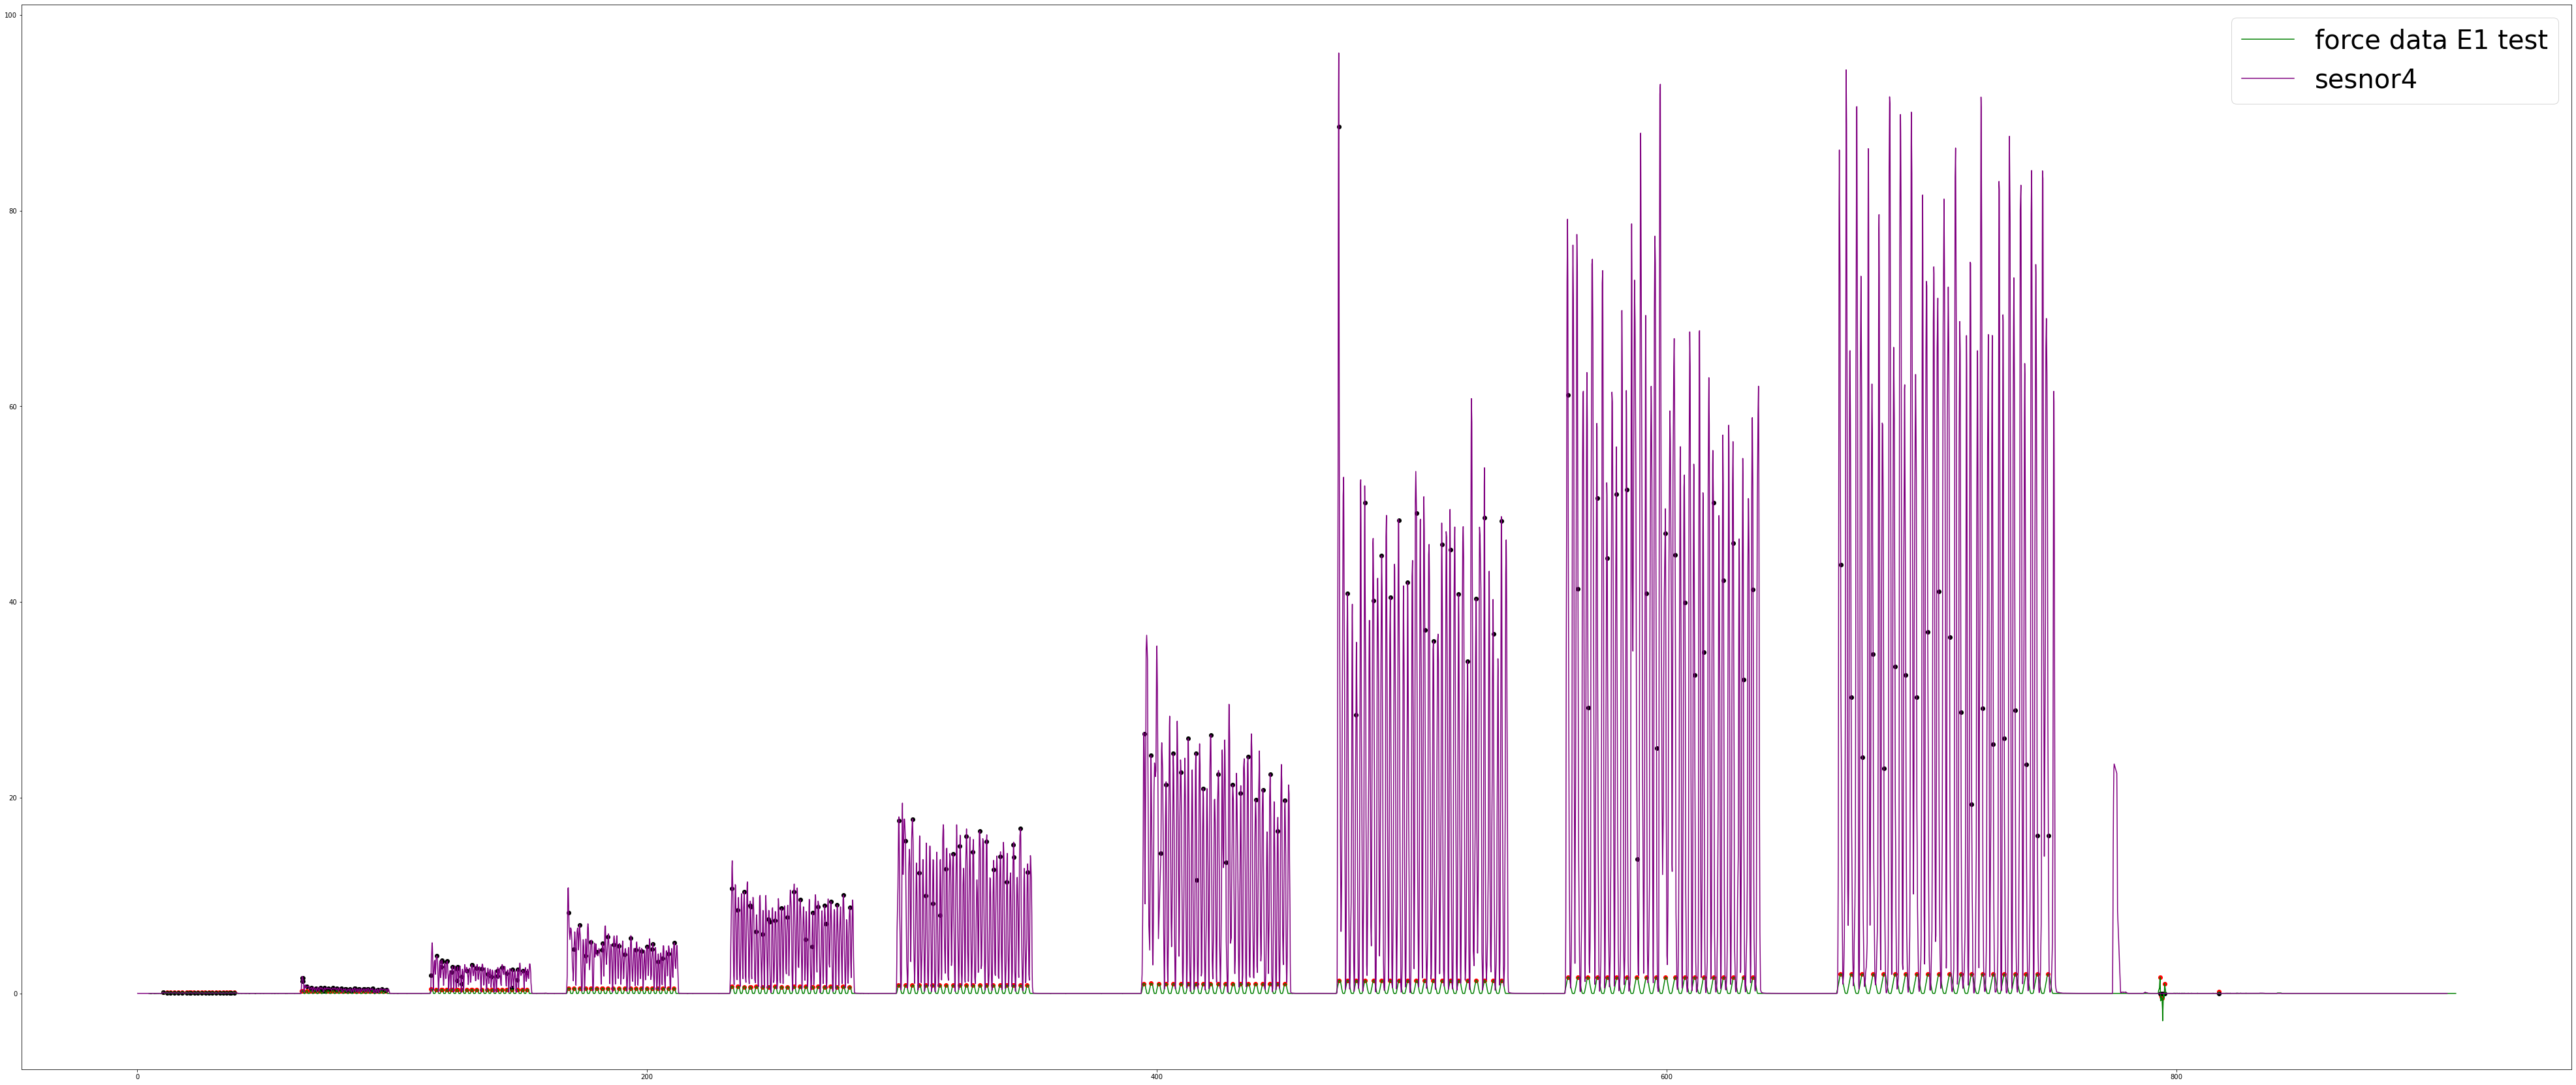

In [31]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - E2

plt.figure(figsize=(70, 30))

# plt.plot(E2["Unnamed: 0"],E2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(E2["Unnamed: 0"],E2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(E2["Unnamed: 0"],E2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(E2["Unnamed: 0"],E2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_E2 = x_force_E2 + 4.5
scaled_E2 = E2["Unnamed: 0"]

plt.plot(scaled_x_force_E2,Load_E2,color = 'green', label = 'force data E1 test' )
plt.plot(scaled_E2,E2["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for E2")

#finding the peaks
pidx_Load_E2, _ = find_peaks(Load_E2,prominence= 0.1 )
peaks_Load_E2 = Load_E2[pidx_Load_E2]
peaks_Ltime_E2 = scaled_x_force_E2[pidx_Load_E2]

plt.scatter(peaks_Ltime_E2,peaks_Load_E2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_E2time = []
peaks_Ltime_E2.reset_index(drop = True, inplace = True)
peaks_Load_E2.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_E2)):
    idx_E2time.append(bisect.bisect_left(E2["Unnamed: 0"], peaks_Ltime_E2[i]))

plt.scatter(E2["Unnamed: 0"][idx_E2time],E2["s4_d"][idx_E2time],color = 'black')

In [32]:
#Storing the peaks into csv file - E2
Load_E2peaks =[]

for i in range(len(peaks_Load_E2)):
    Load_E2peaks.append(peaks_Load_E2[i])
    
content_E2 = {'R1':E2["s1_d"][idx_E2time],
              'R2':E2["s2_d"][idx_E2time],
              'R3':E2["s3_d"][idx_E2time],
              'R4':E2["s4_d"][idx_E2time], 
              'Load': Load_E2peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_E2 = pd.DataFrame(content_E2, columns = ['R1','R2','R3','R4','Load'])

df_E2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\E2.csv',index = False, header = True)

Sensor 3 is more profound for E3


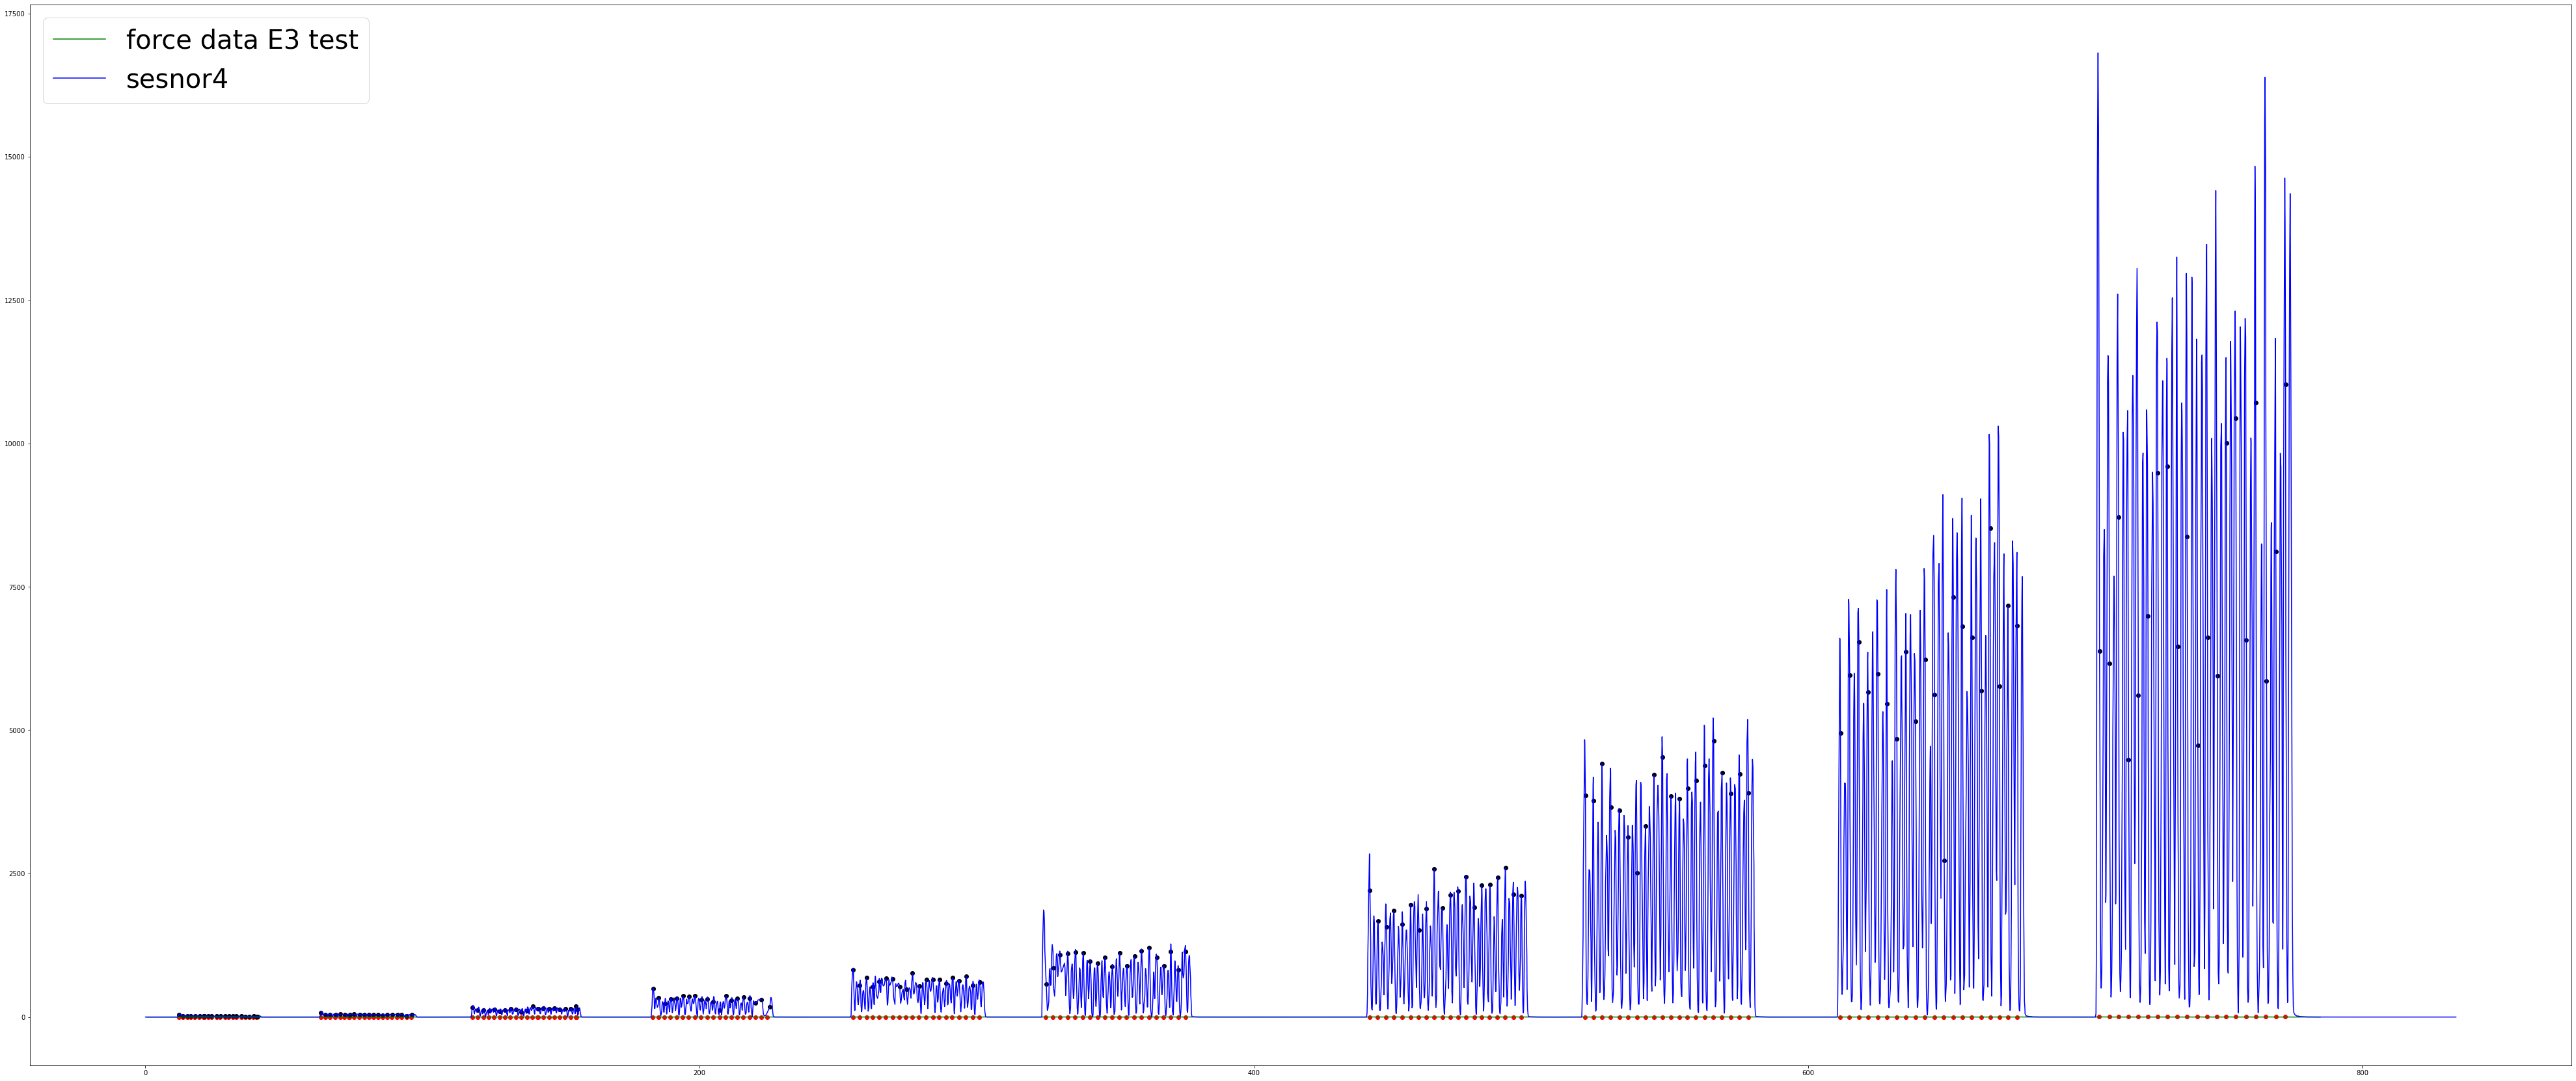

In [39]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - E3

plt.figure(figsize=(70, 30))

# plt.plot(E3["Unnamed: 0"],E3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(E3["Unnamed: 0"],E3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(E3["Unnamed: 0"],E3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(E3["Unnamed: 0"],E3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_E3 = x_force_E3 + 0.5
scaled_E3 = E3["Unnamed: 0"]

plt.plot(scaled_x_force_E3,Load_E3,color = 'green', label = 'force data E3 test' )
plt.plot(scaled_E3,E3["s3_d"], color = 'blue', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 3 is more profound for E3")

#finding the peaks
pidx_Load_E3, _ = find_peaks(Load_E3,prominence= 0.1 )
peaks_Load_E3 = Load_E3[pidx_Load_E3]
peaks_Ltime_E3 = scaled_x_force_E3[pidx_Load_E3]

plt.scatter(peaks_Ltime_E3,peaks_Load_E3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_E3time = []
peaks_Ltime_E3.reset_index(drop = True, inplace = True)
peaks_Load_E3.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_E3)):
    idx_E3time.append(bisect.bisect_left(E3["Unnamed: 0"], peaks_Ltime_E3[i]))

plt.scatter(E3["Unnamed: 0"][idx_E3time],E3["s3_d"][idx_E3time],color = 'black')

In [40]:
#Storing the peaks into csv file - E3
Load_E3peaks =[]

for i in range(len(peaks_Load_E3)):
    Load_E3peaks.append(peaks_Load_E3[i])
    
content_E3 = {'R1':E3["s1_d"][idx_E3time],
              'R2':E3["s2_d"][idx_E3time],
              'R3':E3["s3_d"][idx_E3time],
              'R4':E3["s4_d"][idx_E3time], 
              'Load': Load_E3peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_E3 = pd.DataFrame(content_E3, columns = ['R1','R2','R3','R4','Load'])

df_E3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\E3.csv',index = False, header = True)